In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\prajw\Data Science\Assignments\15 Random forests\Company_Data.csv")

In [3]:
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [5]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [6]:
df.skew(numeric_only=True)

Sales          0.185560
CompPrice     -0.042755
Income         0.049444
Advertising    0.639586
Population    -0.051227
Price         -0.125286
Age           -0.077182
Education      0.044007
dtype: float64

In [7]:
df.kurt(numeric_only=True)

Sales         -0.080877
CompPrice      0.041666
Income        -1.085289
Advertising   -0.545118
Population    -1.202318
Price          0.451885
Age           -1.134392
Education     -1.298332
dtype: float64

In [8]:
df.shape

(400, 11)

<Axes: >

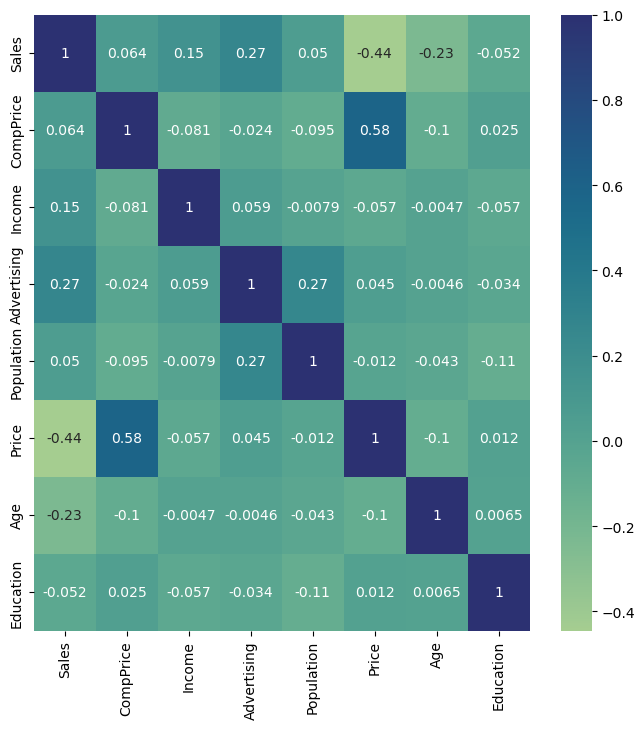

In [9]:
corr=df.corr(numeric_only=True)
plt.figure(figsize=(8,8))
sns.heatmap(corr,annot=True,cmap="crest")

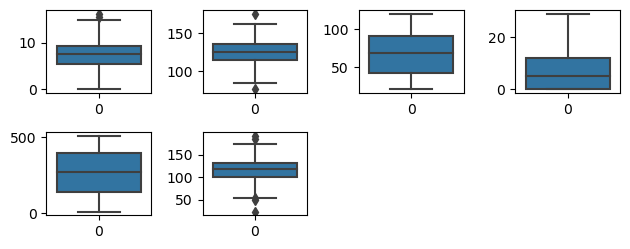

In [10]:
plt.subplot(4,4,1)
sns.boxplot(df['Sales'])

plt.subplot(4,4,2)
sns.boxplot(df['CompPrice'])

plt.subplot(4,4,3)
sns.boxplot(df['Income'])

plt.subplot(4,4,4)
sns.boxplot(df['Advertising'])

plt.subplot(4,4,5)
sns.boxplot(df['Population'])

plt.subplot(4,4,6)
sns.boxplot(df['Price'])

plt.tight_layout()

In [11]:
def outlier_detection(df,col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3-q1
    
    upper = q3+(1.5*iqr)
    lower = q1-(1.5*iqr)
    
    return lower,upper

In [12]:
outlier_detection(df,'Sales')

(-0.504999999999999, 15.215)

In [13]:
outlier_detection(df,'CompPrice')

(85.0, 165.0)

In [14]:
outlier_detection(df,'Price')

(53.5, 177.5)

In [15]:
df.loc[df['Sales']>15.215, 'Sales']=15.215

In [16]:
df.loc[df['CompPrice']>165, 'CompPrice']=165

In [17]:
df.loc[df['Price']>177.5, 'Price']=177.5

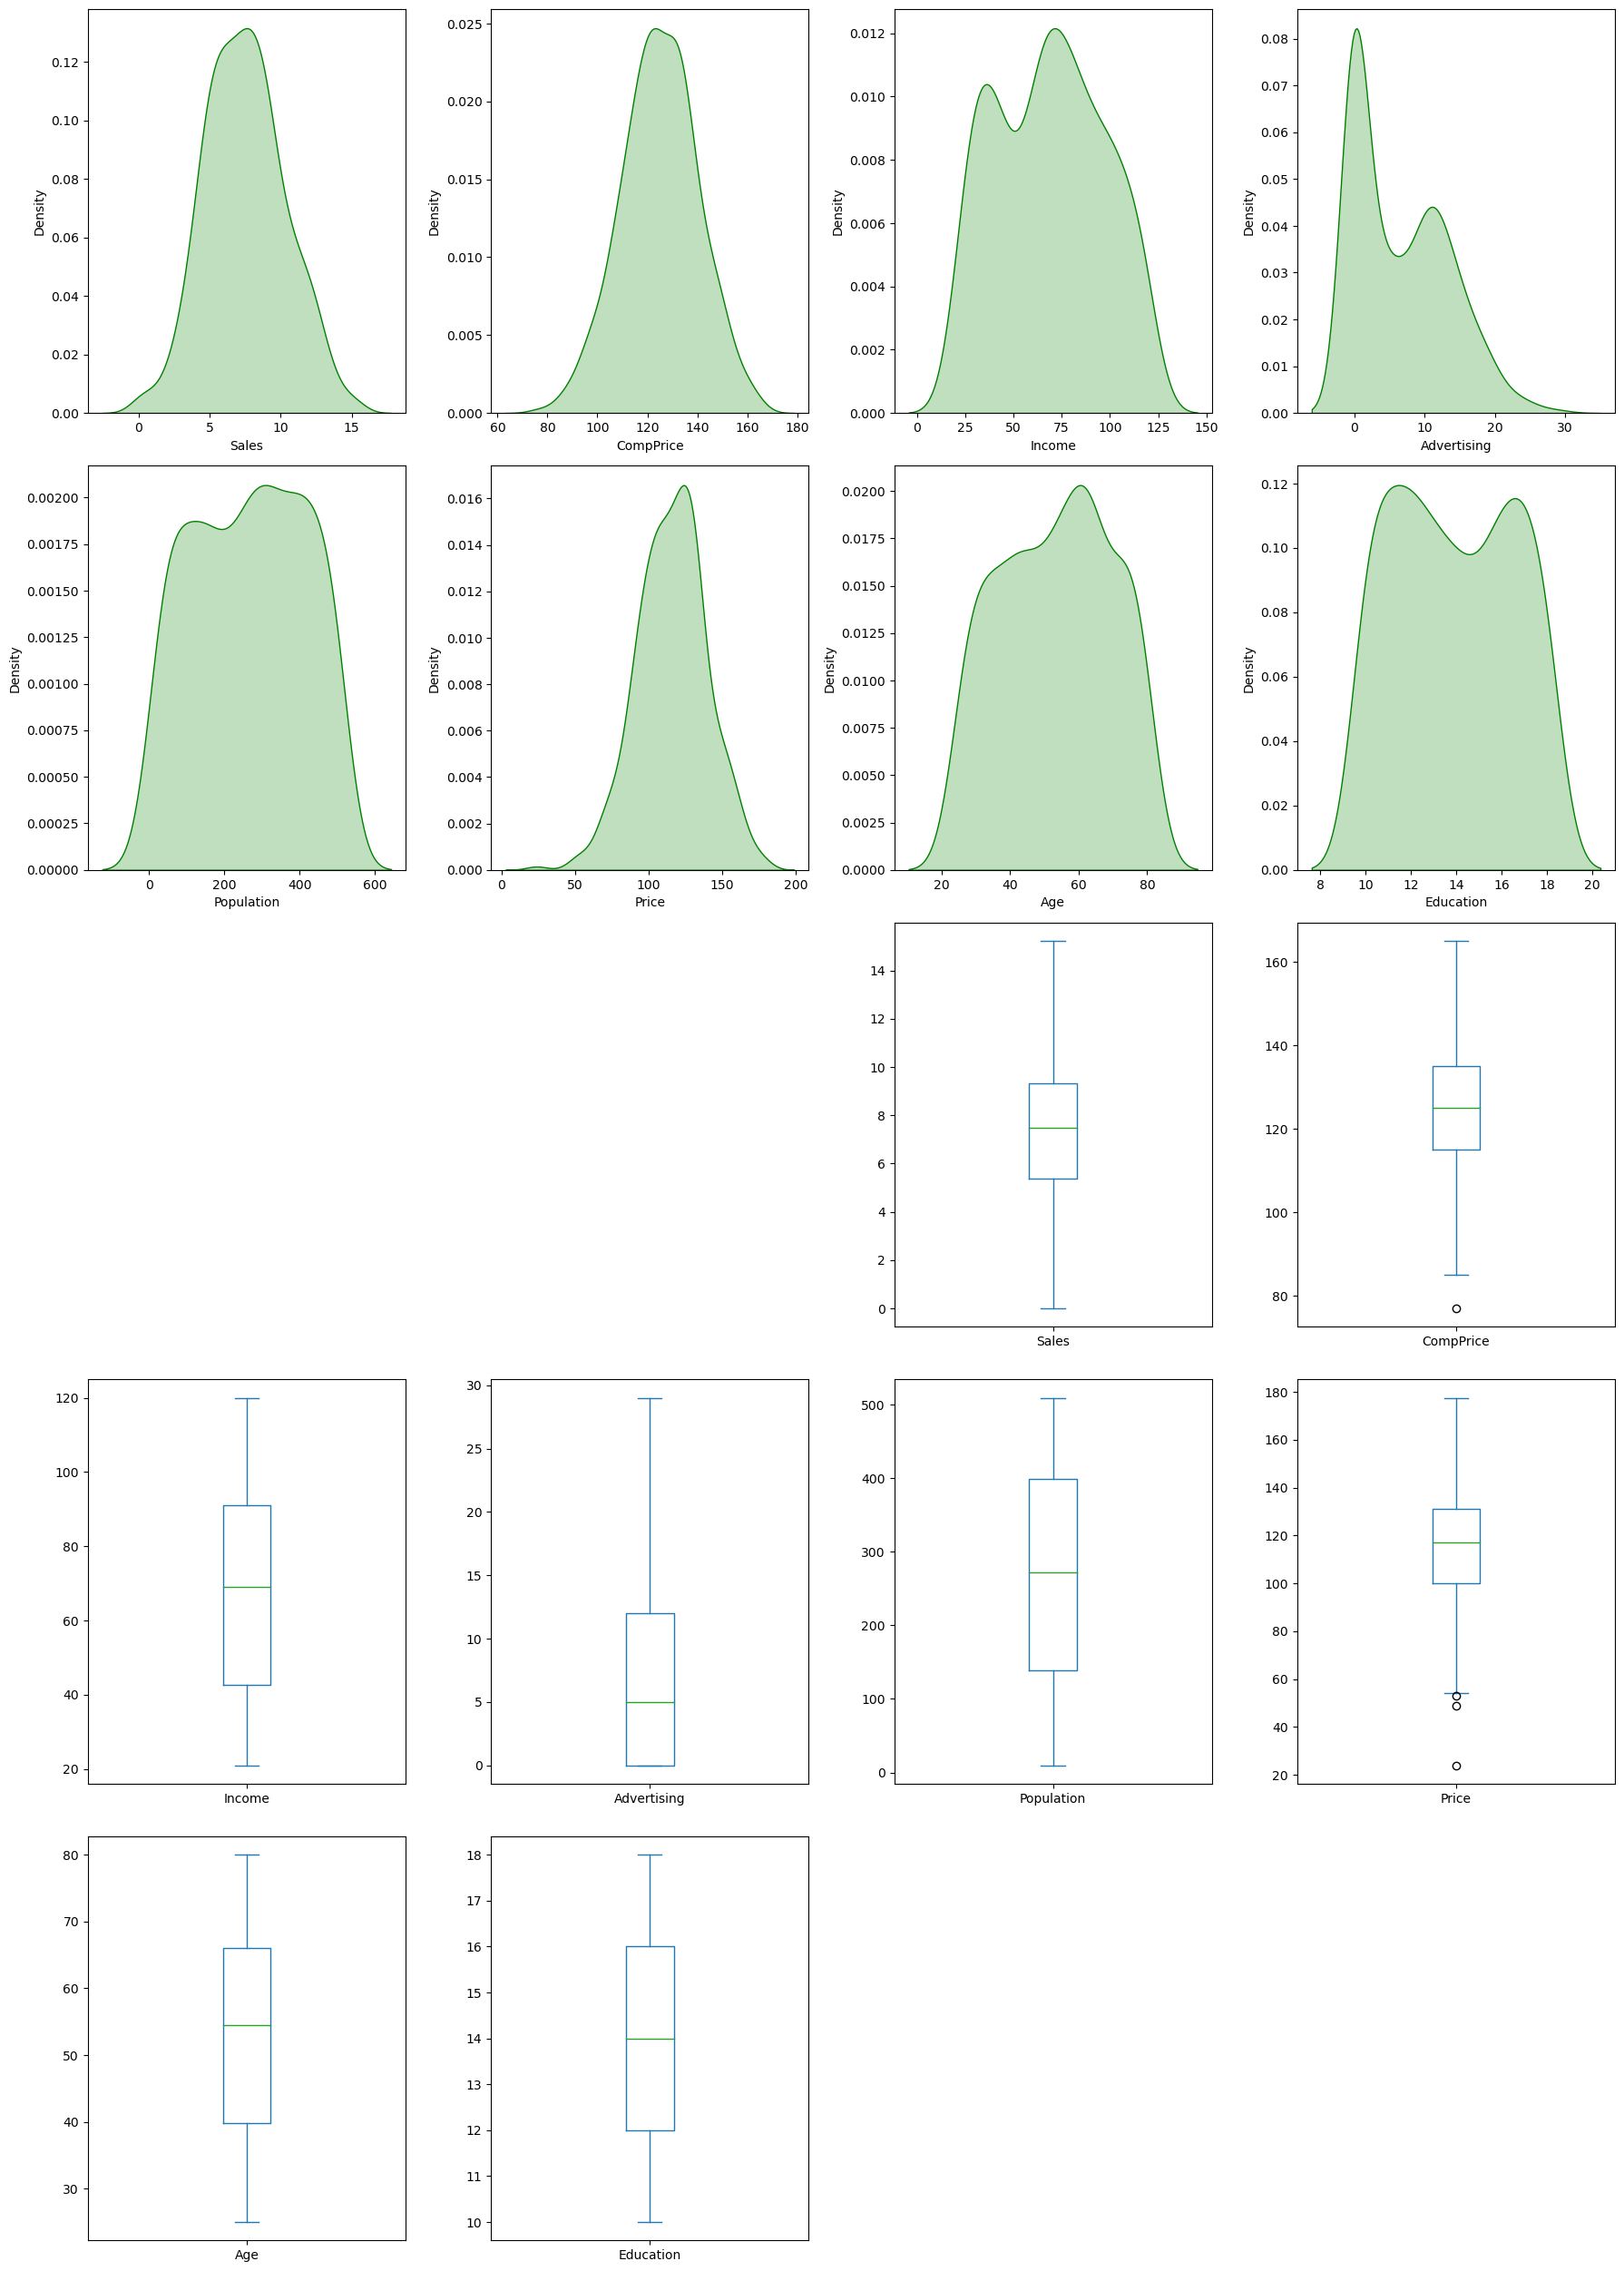

In [18]:

plt.figure(figsize=(18,40))
for i,col in enumerate(['Sales','CompPrice','Income','Advertising',
                        'Population','Price','Age','Education'],1):
    plt.subplot(8,4,i)
    sns.kdeplot(df[col],color='g',fill=True)
    plt.subplot(8,4,i+10)
    df[col].plot.box()
plt.tight_layout() 
plt.show()

In [19]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120.0,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83.0,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80.0,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97.0,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128.0,Bad,38,13,Yes,No


In [20]:
df1=df.copy()

In [21]:
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder
le= LabelEncoder()

df['ShelveLoc'] = le.fit_transform(df['ShelveLoc'])
df['Urban'] = le.fit_transform(df['Urban'])
df['US'] = le.fit_transform(df['US'])

In [22]:
# df1=pd.get_dummies(df,columns=["ShelveLoc","Urban","US"])

In [23]:
df_cat = df1.select_dtypes(object).columns
df_cat

oe = OrdinalEncoder()
df1[df_cat] = oe.fit_transform(df1[df_cat])

In [24]:
df1.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120.0,0.0,42,17,1.0,1.0
1,11.22,111,48,16,260,83.0,1.0,65,10,1.0,1.0
2,10.06,113,35,10,269,80.0,2.0,59,12,1.0,1.0
3,7.40,117,100,4,466,97.0,2.0,55,14,1.0,1.0
4,4.15,141,64,3,340,128.0,0.0,38,13,1.0,0.0


In [25]:
df1["sales"]="small"
df1.loc[df1["Sales"]>7.49,"sales"]="large"
df1.drop(["Sales"],axis=1,inplace=True)

In [26]:
df1.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales
0,138,73,11,276,120.0,0.0,42,17,1.0,1.0,large
1,111,48,16,260,83.0,1.0,65,10,1.0,1.0,large
2,113,35,10,269,80.0,2.0,59,12,1.0,1.0,large
3,117,100,4,466,97.0,2.0,55,14,1.0,1.0,small
4,141,64,3,340,128.0,0.0,38,13,1.0,0.0,small


In [27]:
pd.DataFrame({"columns":df1.columns})

,columns
0,CompPrice
1,Income
2,Advertising
3,Population
4,Price
5,ShelveLoc
6,Age
7,Education
8,Urban
9,US


In [28]:
'''array=df1.values
x=array[:,:-1]
y=array[:,-1]'''

x=df1.iloc[:,:-1]
y=df1.iloc[:,-1]

In [29]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix

In [30]:
kfold=KFold(n_splits=8,shuffle=True,random_state=6)

In [31]:
num_trees=200
max_features=3

In [32]:
model=RandomForestClassifier(n_estimators=num_trees,max_features=max_features)

In [33]:
result=cross_val_score(model,x,y,cv=kfold)

In [34]:
result.mean()

0.795

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=6)

In [37]:
model=RandomForestClassifier(oob_score=True,n_estimators=num_trees,max_features=max_features)

In [38]:
model.fit(x_train,y_train)

RandomForestClassifier(max_features=3, n_estimators=200, oob_score=True)

In [39]:
model.oob_score_

0.815625

In [40]:
pred_train=model.predict(x_train)

In [41]:
accuracy_score(y_train,pred_train)

1.0

In [42]:
confusion_matrix(y_train,pred_train)

array([[159,   0],
       [  0, 161]], dtype=int64)

In [43]:
pred_test=model.predict(x_test)

In [44]:
accuracy_score(y_test,pred_test)

0.75

In [45]:
confusion_matrix(y_test,pred_test)

array([[30, 10],
       [10, 30]], dtype=int64)

In [46]:
df_t=pd.DataFrame({"Actual":y_test,"Predicted":pred_test})

In [47]:
df_t

,Actual,Predicted
137,small,small
138,large,large
13,large,large
95,small,small
175,large,small
...,...,...
209,small,small
223,small,small
90,small,small
286,large,large
